# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
print(df.head())
df.shape

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


(130, 3)

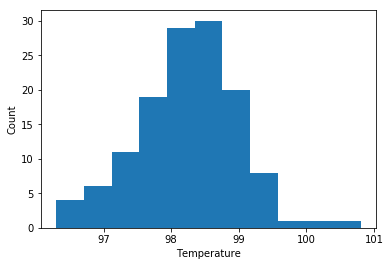

In [3]:
#Explore the distribution of body temperatures
import matplotlib.pyplot as plt
n = df.shape[0]**0.5
plt.hist(df['temperature'], bins=int(n))
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

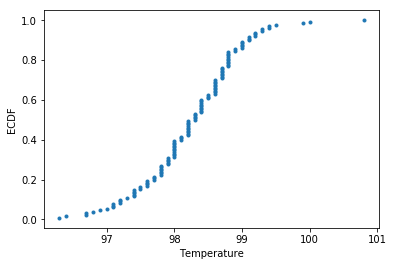

In [4]:
#Is body temperature normally distributed?
#Generate Empirical CDF based on observed body temperatures
import numpy as np
temps = np.sort(list(df['temperature']))
index = np.arange(1, len(temps) + 1) / len(temps)
plt.plot(temps, index, marker='.', linestyle='none')
plt.xlabel('Temperature')
plt.ylabel('ECDF')
plt.show()

In [5]:
#Sample a normal distribution using the mean and standard deviation calculated from the body temperature data
mu = np.mean(temps)
sd = np.std(temps)
samples = np.random.normal(mu, sd, 10000)
#Order samples and calculate their percentiles for CDF plot
sample_cdf_x = np.sort(samples)
sample_cdf_y = np.arange(1, len(samples) + 1) / len(samples)

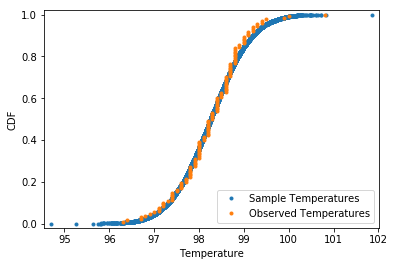

In [6]:
#Plot the Empirical CDF and the CDF of the sample to compare the distributions
plt.plot(sample_cdf_x, sample_cdf_y, marker='.', linestyle='none')
plt.plot(temps, index, marker='.', linestyle='none')
plt.xlabel('Temperature')
plt.ylabel('CDF')
plt.margins(0.02)
plt.legend(('Sample Temperatures','Observed Temperatures'), loc='lower right')
plt.show()

**Answer to question 1**: Body temperatures appear to follow a normal distribution.

**Question 2**: Is the sample size large? Are the observations independent?

In order for the Central Limit Theorem to apply, we must have a sample size n >= 30.

In [7]:
n = df.shape[0]
print(n)

130


The sample size is large enough.

Observations are considered independent if the occurrence of one event doesn't change the probability of another. In this study, the observations of body temperatures are independent.

**Question 3**: Is the true population mean really 98.6$^{\circ}$F?
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?

To answer this question, I will use a one-sample test since we only have the data for the sample mean. The sample size is 130, so the z statistic can be used.

In [8]:
#Print the sample mean as a reference point
print(mu)

98.2492307692


The null hypothesis is that the population mean is 98.6. Calculate the probability of sampling a mean *at least* as extreme as the mean calculated above.

In [10]:
#Difference in means
pop_mean = 98.6
diff_mean = mu - pop_mean
print(diff_mean)

-0.350769230769


In [11]:
#Shift body temperature data so that sample mean = population mean
temps_shifted = temps - mu + pop_mean
print(np.mean(temps_shifted))

98.6


In [ ]:
#Simulate experiment 10,000 times with shifted data, storing the difference of means in an array of bootstrap replicates.
np.random.seed(4321)
n_sim = 100000
bs_replicates = np.empty(n_sim)
for i in range(n_sim):
    bs_sample = np.random.choice(temps_shifted, len(temps_shifted))
    bs_replicates[i] = np.mean(bs_sample) - pop_mean
p_value = np.sum(bs_replicates <= diff_mean) / len(bs_replicates)
print('P-value=',p_value)

In [46]:
#Calculate test statistic
test_stat = (diff_mean * np.sqrt(len(temps))) / sd
print(test_stat)

-5.47592520208


In [50]:
#Perform z-test with test statistic
norm_dist1 = np.random.normal(0, 1, 1000000)
p = np.sum(norm_dist1 <= test_stat) / len(norm_dist1)
print('P-Value =', p)

P-Value = 0.0


In [44]:
#For reference, compare "hacker" statistics to output from stats t-test function
from scipy import stats
results = stats.ttest_1samp(temps, 98.6)
p_two_tailed = results[1]
p = p_two_tailed / 2
print('P-Value =', p)

P-Value = 1.20531602078e-07


For the purpose of hypothesis testing with a large sample and sizeable difference between the sample mean and population mean, a t-test and a z-test will both result in extremely small p-values. The result of the z-test is a p-value that is so small, Python stores it as zero. Evidently, we reject the null hypothesis that the mean body temperature is equal to 98.6$^{\circ}$F.

**Question 4**: Draw a small sample of size 10 from the data and repeat both tests. 
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?

In [15]:
#Draw a sample of size 10
sample_10 = np.random.choice(temps, 10)
print(sample_10)

[ 98.6  97.7  98.4  97.9  98.6  97.4  98.6  98.2  98.   98.8]


In [51]:
#Calculate test statistic using numpy
test_stat = (np.mean(sample_10) - pop_mean) / (np.std(sample_10) / np.sqrt(len(sample_10)))
print('Test statistic:',test_stat)

Test statistic: -2.75971624543


The first thing we notice is that with the smaller sample size, the test statistic has become less extreme.

In [34]:
#Calculate P-Value using z-test
norm_dist = np.random.normal(0, 1, 1000000)
p = np.sum(norm_dist <= test_stat) / len(norm_dist)
print('P-value =', p)

P-value = 0.002917


In [41]:
#Calculate P-Value using t-test
p_two_tailed = stats.ttest_1samp(sample_10, 98.6)[1]
p = p_two_tailed / 2
print('P-Value =', p)

P-Value = 0.0139489358204


In the case of a sample size of 10, the p-value given by the z-test is much smaller than the one given by the t-test. This is an important difference, as the small sample size means that the Central Limit Theorem is not effective and our p-value should be calculated using the t-distribution rather than the normal distribution.

**Question 5**: At what temperature should we consider someone's temperature to be "abnormal"?
 <li> Start by computing the margin of error and confidence interval.

In [64]:
#Margin of error with approximately 95% confidence
std_err = np.std(temps) / np.sqrt(len(temps))
marg_err = 2 * std_err
print(marg_err)

0.12811322939


In [73]:
#95% confidence interval of mean body temperature, using bootstrap replicates
bs_reps = np.empty(100000)
interval = 95
for i in range(len(bs_reps)):
    samples = np.random.choice(temps, len(temps))
    bs_reps[i] = np.mean(samples)
percentiles = [(100 - interval) / 2, 100 - (100 - interval) / 2]
conf_int1 = np.percentile(bs_reps, percentiles)
print('Confidence interval:', conf_int1)

Confidence interval: [ 98.12461538  98.37538462]


Someone's temperature should be considered "abnormal" if it falls outside of the 95% confidence interval, i.e. if it is below approximately 98.12$^{\circ}$F or above 98.38$^{\circ}$F

**Question 6**: Is there a significant difference between males and females in normal temperature?
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.

In [95]:
#Find the mean body temperature for males and females
males = df.loc[df['gender'] == 'M', 'temperature']
females = df.loc[df['gender'] == 'F', 'temperature']
print('Females:',np.mean(females))
print('Males:',np.mean(males))
print('Difference:', np.mean(females) - np.mean(males))

Females: 98.39384615384613
Males: 98.1046153846154
Difference: 0.289230769230727


In order to test the significance of the difference of means, I will conduct a two-tailed, two-sample z-test since we have data for both the male and female populations. The null hypothesis is that the means body temperature does not differ between males and females.

In [96]:
#Conduct two-tailed, two-sample z-test for equality of means
diff_means = np.mean(females) - np.mean(males)
sample_n = 100000
perm_replicates = np.empty(sample_n)
for i in range(sample_n):
    permuted_data = np.random.permutation(temps)
    perm_sample_1 = permuted_data[:len(females)]
    perm_sample_2 = permuted_data[len(females):]
    perm_replicates[i] = np.mean(perm_sample_1) - np.mean(perm_sample_2)
p = np.sum(np.abs(perm_replicates) >= diff_means) / len(perm_replicates)
print('P-value =', p)

P-value = 0.02403


The result of this test is that there is a 2.4% chance of observing the empirical difference between mean body temperatures in males and females given that they come from identical distributions. At a significance level of 5% we would reject the null hypothesis that the two populations have equal means.